# load package

In [1]:
from astropy.io import fits
import numpy as np
from multiprocessing import Process
from sklearn.neighbors import BallTree
from astropy.cosmology import FlatLambdaCDM
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from astropy.table import Table,Column,vstack
from astropy.io import ascii
import os
import matplotlib.colors as mcolors

In [2]:
from astropy.coordinates import SkyCoord
from astropy.cosmology import FlatLambdaCDM,z_at_value
cosmo = FlatLambdaCDM(H0 = 67.74,Om0 = 0.3089,Ob0 = 0.0486)
from scipy.spatial import cKDTree
import astropy.units as u
import pandas as pd

In [3]:
np.std?

Signature:
np.std(
    a,
    axis=None,
    dtype=None,
    out=None,
    ddof=0,
    keepdims=<no value>,
    *,
    where=<no value>,
)
Docstring:
Compute the standard deviation along the specified axis.

Returns the standard deviation, a measure of the spread of a distribution,
of the array elements. The standard deviation is computed for the
flattened array by default, otherwise over the specified axis.

Parameters
----------
a : array_like
    Calculate the standard deviation of these values.
axis : None or int or tuple of ints, optional
    Axis or axes along which the standard deviation is computed. The
    default is to compute the standard deviation of the flattened array.

    .. versionadded:: 1.7.0

    If this is a tuple of ints, a standard deviation is performed over
    multiple axes, instead of a single axis or all the axes as before.
dtype : dtype, optional
    Type to use in computing the standard deviation. For arrays of
    integer type the default is float64, for 

In [4]:
import scipy

# VVDS

In [3]:
SED_Para = ['IDENT','SCALE_BEST','MOD_BEST','EXTLAW_BEST','EBV_BEST','CHI_BEST','NBAND_USED', \
            'AGE_BEST','AGE_INF','AGE_MED','AGE_SUP','MASS_BEST','MASS_INF','MASS_MED','MASS_SUP',\
            'SFR_BEST','SFR_INF','SFR_MED','SFR_SUP','SSFR_BEST','SSFR_INF','SSFR_MED','SSFR_SUP', \
            'B_OBS','V_OBS','R_OBS','I_OBS','u_OBS','g_OBS','r_OBS','i_OBS','z_OBS',\
            'ERR_B_OBS','ERR_V_OBS','ERR_R_OBS','ERR_I_OBS','ERR_u_OBS','ERR_g_OBS','ERR_r_OBS','ERR_i_OBS','ERR_z_OBS',\
            'B_MOD','V_MOD','R_MOD','I_MOD','u_MOD','g_MOD','r_MOD','i_MOD','z_MOD',\
            'CONTEXT','ZSPEC',\
            'B_ABS','V_ABS','R_ABS','I_ABS','u_ABS','g_ABS','r_ABS','i_ABS','z_ABS',\
            'Z_MAX']



deep = pd.read_table('/home/hygao/research/LePHARE/lephare_dev/zy_VVDS_deep_BVRIugriz/VVDS_deep_BVRIugriz.out',\
                              sep='\s+',skiprows=59,header=None,names=SED_Para,index_col=False)

In [4]:
cigale_deep = Table.read("/home/yunzheng/PAC/code/VVDS_desi/VVDS_SED_DEEP/deep_BVRIugriz/out/results.fits")
deep0 = Table.read("/home/yunzheng/PAC/code/VVDS_desi/VVDS_cesam_cata/cesam_vvds_spF02_DEEP_Full.fits")

In [5]:
zmax = np.array(deep['Z_MAX'])
g = np.array(deep['g_OBS'])
z = np.array(deep['z_OBS'])
g_z = g-z
mass = np.array(deep['MASS_BEST'])
redshift = np.array(deep['ZSPEC'])
tsr = deep0['TSR']
ssr = deep0['SSR']
i = np.array(deep['i_OBS'])

In [7]:
np.unique(g)

array([-99.   ,  14.536,  16.365, ...,  28.254,  28.775,  30.392])

In [7]:
i.shape

(8153,)

In [6]:
g_z = g-z
index = ((z>0)&(redshift>=0.5)&(redshift<=0.7))
# index = ((z>0)&(redshift>=0.3)&(redshift<=0.5))
g = g[index]
z = z[index]
i = i[index]
g_z=g_z[index]
mass = mass[index]
redshift = redshift[index]
zmax = zmax[index]
tsr = tsr[index]
ssr = ssr[index]

In [80]:
np.unique(g)

array([19.644, 19.834, 20.018, 20.051, 20.229, 20.298, 20.303, 20.312,
       20.33 , 20.412, 20.459, 20.479, 20.529, 20.562, 20.573, 20.577,
       20.604, 20.625, 20.643, 20.708, 20.724, 20.748, 20.759, 20.771,
       20.774, 20.835, 20.911, 20.914, 20.919, 20.944, 20.948, 20.961,
       20.982, 21.053, 21.058, 21.066, 21.072, 21.08 , 21.085, 21.096,
       21.099, 21.119, 21.12 , 21.123, 21.134, 21.14 , 21.154, 21.155,
       21.174, 21.178, 21.18 , 21.183, 21.188, 21.218, 21.239, 21.242,
       21.256, 21.261, 21.278, 21.302, 21.329, 21.337, 21.339, 21.355,
       21.359, 21.401, 21.428, 21.433, 21.44 , 21.45 , 21.462, 21.473,
       21.474, 21.485, 21.5  , 21.505, 21.511, 21.513, 21.559, 21.571,
       21.574, 21.581, 21.59 , 21.594, 21.6  , 21.614, 21.615, 21.619,
       21.625, 21.63 , 21.633, 21.638, 21.65 , 21.663, 21.7  , 21.725,
       21.738, 21.774, 21.776, 21.785, 21.789, 21.793, 21.801, 21.806,
       21.807, 21.813, 21.833, 21.847, 21.852, 21.857, 21.88 , 21.899,
      

In [10]:
g

array([23.972, 23.938, 23.178, ..., 23.124, 24.292, 23.969])

In [16]:
tsr.shape

(1598,)

In [35]:
np.unique(zmax)

array([0.311269, 0.316798, 0.32    , ..., 1.72992 , 1.76008 , 1.8589  ])

In [7]:
index = ((tsr>0)&(ssr>0))
z = z[index]
i = i[index]
g_z=g_z[index]
mass = mass[index]
redshift = redshift[index]
zmax = zmax[index]
tsr = tsr[index]
ssr = ssr[index]

# index = (zmax>0.3)
index = (zmax>0.5)
z = z[index]
i = i[index]
g_z=g_z[index]
mass = mass[index]
redshift = redshift[index]
zmax = zmax[index]
tsr = tsr[index]
ssr = ssr[index]
# zmax[(zmax>0.5)]=0.5
zmax[(zmax>0.7)]=0.7

In [82]:
tsr.shape

(995,)

In [38]:
np.unique(zmax)

array([0.311269, 0.32    , 0.323449, 0.32528 , 0.33    , 0.330691,
       0.331867, 0.331879, 0.333553, 0.334252, 0.34    , 0.340525,
       0.341295, 0.343011, 0.349603, 0.35    , 0.350304, 0.350568,
       0.352722, 0.353637, 0.359263, 0.360309, 0.360829, 0.36096 ,
       0.363354, 0.363599, 0.365285, 0.367392, 0.369937, 0.37    ,
       0.372221, 0.372453, 0.375512, 0.375545, 0.37729 , 0.379399,
       0.382682, 0.38476 , 0.385856, 0.386208, 0.387147, 0.387173,
       0.387234, 0.39    , 0.390258, 0.391387, 0.393321, 0.395024,
       0.397842, 0.400097, 0.401319, 0.402346, 0.405787, 0.406935,
       0.408124, 0.408197, 0.408434, 0.408686, 0.408984, 0.409395,
       0.409433, 0.410411, 0.4109  , 0.413761, 0.415563, 0.41665 ,
       0.418077, 0.42    , 0.420327, 0.423211, 0.423602, 0.423636,
       0.424275, 0.424472, 0.424488, 0.424682, 0.425522, 0.426159,
       0.426328, 0.426616, 0.426696, 0.42707 , 0.428767, 0.429376,
       0.429777, 0.430392, 0.435085, 0.43608 , 0.43766 , 0.438

In [8]:
V_0 = []
for index in range(len(zmax)):
    temp = cosmo.comoving_volume(zmax[index]) - cosmo.comoving_volume(0.5)
    V_0.append(temp.value)
    
V_1 = np.array(V_0)
Vtotal = cosmo.comoving_volume(0.7) - cosmo.comoving_volume(0.5)
# Vtotal = cosmo.comoving_volume(0.5) - cosmo.comoving_volume(0.3)
Vtotal
weight0 = Vtotal.value/V_1

weight1 = 1/ssr * 1/tsr * weight0

In [40]:
np.unique(i)

array([17.985, 18.506, 18.508, 18.509, 18.721, 18.792, 18.797, 18.84 ,
       18.88 , 18.964, 18.987, 18.993, 19.003, 19.006, 19.026, 19.05 ,
       19.109, 19.118, 19.15 , 19.155, 19.166, 19.199, 19.219, 19.244,
       19.252, 19.266, 19.305, 19.334, 19.342, 19.381, 19.394, 19.466,
       19.471, 19.477, 19.502, 19.509, 19.528, 19.546, 19.555, 19.576,
       19.583, 19.588, 19.614, 19.629, 19.678, 19.684, 19.708, 19.744,
       19.762, 19.771, 19.781, 19.789, 19.799, 19.812, 19.827, 19.833,
       19.849, 19.898, 19.904, 19.916, 19.92 , 19.924, 19.927, 19.956,
       19.969, 19.984, 20.035, 20.041, 20.06 , 20.061, 20.062, 20.063,
       20.091, 20.118, 20.13 , 20.132, 20.153, 20.158, 20.159, 20.204,
       20.205, 20.212, 20.219, 20.229, 20.23 , 20.24 , 20.263, 20.272,
       20.28 , 20.324, 20.347, 20.353, 20.367, 20.407, 20.416, 20.428,
       20.438, 20.458, 20.465, 20.468, 20.47 , 20.471, 20.474, 20.531,
       20.534, 20.557, 20.558, 20.576, 20.579, 20.599, 20.618, 20.62 ,
      

In [21]:
np.min(g_z)

-0.05700000000000216

In [23]:
np.unique(g_z)

array([-0.057,  0.014,  0.163, ...,  3.649,  3.691,  3.698])

In [25]:
g_z_VVDS = g_z[g_z>2]

In [26]:
g_z_VVDS

array([2.48 , 2.581, 2.571, 2.606, 3.406, 3.135, 2.712, 2.232, 3.035,
       2.102, 2.282, 3.211, 2.382, 2.848, 2.716, 2.078, 2.809, 2.669,
       2.399, 2.924, 2.952, 3.279, 2.798, 2.945, 3.051, 2.127, 2.319,
       2.439, 2.27 , 2.687, 2.069, 2.083, 2.142, 2.07 , 2.767, 2.087,
       2.797, 2.774, 2.658, 2.182, 2.169, 2.503, 2.932, 2.085, 2.026,
       2.699, 2.425, 3.649, 2.773, 2.94 , 2.167, 2.831, 2.148, 2.821,
       2.554, 2.097, 2.507, 2.007, 2.478, 2.046, 2.545, 2.63 , 2.804,
       2.581, 2.1  , 2.301, 2.663, 2.008, 2.535, 2.243, 2.841, 2.086,
       2.14 , 2.282, 2.161, 2.428, 2.144, 2.233, 2.678, 2.018, 2.109,
       2.348, 2.788, 2.053, 2.904, 2.446, 2.073, 2.544, 2.872, 2.218,
       2.144, 2.524, 2.233, 2.303, 2.186, 2.488, 3.648, 2.4  , 2.531,
       2.882, 3.093, 2.25 , 2.212, 2.3  , 2.84 , 3.442, 2.065, 3.12 ,
       2.397, 2.808, 2.968, 2.449, 3.221, 2.337, 2.336, 2.737, 2.751,
       3.02 , 2.219, 2.456, 2.531, 2.427, 3.031, 3.148, 2.719, 2.761,
       2.309, 3.033,

In [27]:
np.save("./g_z_VVDS.npy",g_z_VVDS)

In [10]:
test = np.vstack((i,z,g_z,redshift,weight1))
test = test.T

In [47]:
np.unique(i)

array([17.985, 18.506, 18.508, 18.509, 18.721, 18.792, 18.797, 18.84 ,
       18.88 , 18.964, 18.987, 18.993, 19.003, 19.006, 19.026, 19.05 ,
       19.109, 19.118, 19.15 , 19.155, 19.166, 19.199, 19.219, 19.244,
       19.252, 19.266, 19.305, 19.334, 19.342, 19.381, 19.394, 19.466,
       19.471, 19.477, 19.502, 19.509, 19.528, 19.546, 19.555, 19.576,
       19.583, 19.588, 19.614, 19.629, 19.678, 19.684, 19.708, 19.744,
       19.762, 19.771, 19.781, 19.789, 19.799, 19.812, 19.827, 19.833,
       19.849, 19.898, 19.904, 19.916, 19.92 , 19.924, 19.927, 19.956,
       19.969, 19.984, 20.035, 20.041, 20.06 , 20.061, 20.062, 20.063,
       20.091, 20.118, 20.13 , 20.132, 20.153, 20.158, 20.159, 20.204,
       20.205, 20.212, 20.219, 20.229, 20.23 , 20.24 , 20.263, 20.272,
       20.28 , 20.324, 20.347, 20.353, 20.367, 20.407, 20.416, 20.428,
       20.438, 20.458, 20.465, 20.468, 20.47 , 20.471, 20.474, 20.531,
       20.534, 20.557, 20.558, 20.576, 20.579, 20.599, 20.618, 20.62 ,
      

In [54]:
i[i<20]

array([19.781, 19.708, 19.502, 19.799, 19.166, 19.155, 19.342, 19.927,
       19.849, 19.394, 19.252, 19.118, 19.244, 19.509, 18.797, 19.588,
       19.305, 18.721, 19.477, 19.219, 19.528, 19.956, 19.555, 19.789,
       19.916, 19.629, 19.684, 19.969, 19.026, 19.92 , 19.109, 19.05 ,
       19.003, 19.006, 18.88 , 19.924, 19.744, 19.833, 19.762, 19.546,
       19.984, 19.576, 17.985, 19.15 , 18.792, 18.508, 19.266, 18.84 ,
       19.471, 18.993, 19.827, 19.904, 19.812, 19.678, 19.381, 18.509,
       19.771, 18.987, 19.583, 18.506, 19.466, 19.334, 19.614, 19.898,
       19.199, 18.964])

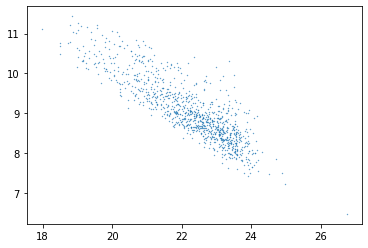

In [143]:
plt.scatter(i,mass,s =0.1)

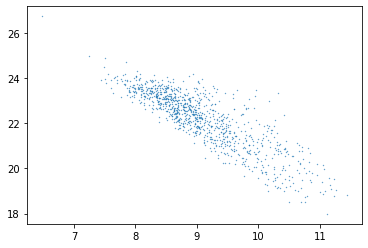

In [133]:
plt.scatter(mass,i,s =0.1)

In [30]:
test.shape

(1588, 5)

In [30]:
# ibins = np.array([20,20.5,21,21.5,22,22.5])
# frac = np.zeros(5)
# for j in range(5):
#     index = ((i>ibins[j])&(i<ibins[j+1]))
#     temp = test[index]
#     temp = temp.T
#     frac[j] = np.sum(temp[-1][temp[2]>2])/np.sum(temp[-1])
    

In [32]:
# ibins = np.array([20,20.5,21,21.5,22,22.5])
# frac_noweight = np.zeros(5)
# for j in range(5):
#     index = ((i>ibins[j])&(i<ibins[j+1]))
#     temp = test[index]
#     temp = temp.T
#     frac_noweight[j] = len(temp[-1][temp[2]>2])/len(temp[-1])
    

In [134]:
ibins = np.array([18,19,20,21,22,23])
# ibins = np.array([20,20.5,21,21.5,22,22.5])
frac_noweight = np.zeros(5)
err_noweight = np.zeros(5)
for j in range(5):
    index = ((i>ibins[j])&(i<ibins[j+1]))
    temp = test[index]
    temp = temp.T
    print(temp.shape)
    frac_each = np.zeros(10000)
    np.random.seed(10000)
    for k in range(10000):
        index_temp = np.random.choice(len(temp[0]),size = len(temp[0]),replace = True)
        g_z_temp = temp[2][index_temp]
        frac_each[k] = len(g_z_temp[g_z_temp>2])/len(g_z_temp)
    frac_noweight[j] = np.mean(frac_each)
    err_noweight[j] = np.std(frac_each,ddof=1)
    

(5, 11)
(5, 54)
(5, 104)
(5, 195)
(5, 306)


In [11]:
# ibins = np.array([18,19,20,21,22,23])
ibins = np.array([20,20.5,21,21.5,22,22.5])
frac_noweight = np.zeros(5)
err_noweight = np.zeros(5)
for j in range(5):
    index = ((i>ibins[j])&(i<ibins[j+1]))
    temp = test[index]
    temp = temp.T
    print(temp.shape)
    frac_each = np.zeros(10000)
    np.random.seed(10000)
    for k in range(10000):
        index_temp = np.random.choice(len(temp[0]),size = len(temp[0]),replace = True)
        g_z_temp = temp[2][index_temp]
        frac_each[k] = len(g_z_temp[g_z_temp>2])/len(g_z_temp)
    frac_noweight[j] = np.mean(frac_each)
    err_noweight[j] = np.std(frac_each,ddof=1)
    

(5, 39)
(5, 63)
(5, 142)
(5, 179)
(5, 246)


In [135]:
ibins = np.array([18,19,20,21,22,23])
# ibins = np.array([20,20.5,21,21.5,22,22.5])
frac_weight = np.zeros(5)
err_weight = np.zeros(5)
for j in range(5):
    index = ((i>ibins[j])&(i<ibins[j+1]))
    temp = test[index]
    temp = temp.T
    frac_each = np.zeros(10000)
    np.random.seed(10000)
    for k in range(10000):
        index_temp = np.random.choice(len(temp[0]),size = len(temp[0]),replace = True)
        g_z_temp = temp[2][index_temp]
        frac_each[k] = np.sum(temp[-1][index_temp][g_z_temp>2])/np.sum(temp[-1][index_temp])
    frac_weight[j] = np.mean(frac_each)
    err_weight[j] = np.std(frac_each,ddof =1)
    

In [111]:
frac_noweight

array([0.43416667, 0.61859365, 0.37380352, 0.25180503, 0.20326504])

In [117]:
frac_noweight

array([0.43416667, 0.61859365, 0.37380352, 0.25180503, 0.20326504])

In [118]:
frac_weight

array([0.40659597, 0.60190757, 0.35827007, 0.23690003, 0.19948793])

In [113]:
err_noweight

array([0.07967269, 0.06064789, 0.04036444, 0.0323566 , 0.02565784])

In [139]:
err_noweight

array([0.14424568, 0.06751413, 0.04408493, 0.02503411, 0.0104631 ])

In [136]:
frac_noweight

array([0.63683636, 0.38917593, 0.28805192, 0.14344769, 0.03600327])

In [137]:
frac_weight

array([0.58493755, 0.35744224, 0.27285065, 0.12912561, 0.03394988])

In [142]:
err_weight

array([0.1544493 , 0.06609475, 0.04372101, 0.02311198, 0.00990667])

(0.0, 1.0)

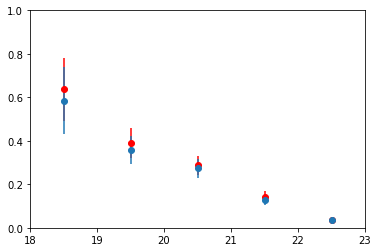

In [141]:
ibin0 = 0.5*(ibins[1:]+ibins[:-1])
plt.errorbar(ibin0,frac_noweight,err_noweight,fmt= 'o',color ='red')
plt.errorbar(ibin0,frac_weight,err_weight,fmt = 'o')
plt.xlim(18,23)
plt.ylim(0,1)

(0.0, 1.0)

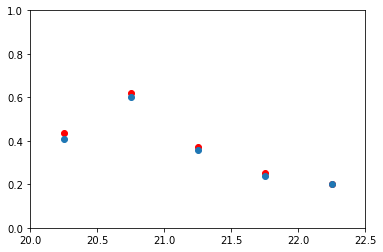

In [33]:
ibin0 = 0.5*(ibins[1:]+ibins[:-1])
plt.scatter(ibin0,frac_noweight,color ='red')
plt.scatter(ibin0,frac)
plt.xlim(20,22.5)
plt.ylim(0,1)

In [58]:
np.min(temp.T[2])

0.7139999999999986

In [59]:
np.max(temp.T[2])

3.2790000000000035

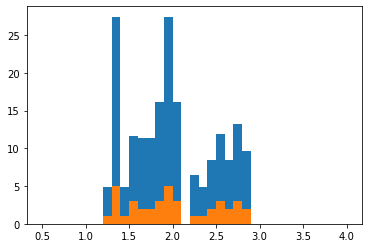

In [23]:
a = plt.hist(temp.T[2],range=[0.5,4],bins = 35,weights = temp.T[-1])
b = plt.hist(temp.T[2],range=[0.5,4],bins = 35)

In [24]:
temp

array([[20.315     , 20.184     ,  1.356     ,  0.6142    ,  6.48349116],
       [20.238     , 19.949     ,  1.857     ,  0.5128    ,  4.82440278],
       [20.185     , 20.042     ,  1.211     ,  0.5162    ,  4.82440278],
       [20.494     , 20.184     ,  2.069     ,  0.5773    ,  4.82440278],
       [20.336     , 20.048     ,  2.083     ,  0.5717    ,  4.82440278],
       [20.202     , 19.915     ,  1.943     ,  0.6795    ,  4.8230088 ],
       [20.041     , 19.928     ,  1.385     ,  0.6354    ,  6.48349116],
       [20.425     , 20.042     ,  2.63      ,  0.6341    ,  3.56741487],
       [20.478     , 20.167     ,  2.301     ,  0.6203    ,  4.8230088 ],
       [20.246     , 20.172     ,  1.517     ,  0.5222    ,  4.82440278],
       [20.467     , 20.117     ,  2.84      ,  0.6321    ,  4.8230088 ],
       [20.028     , 19.636     ,  2.808     ,  0.5106    ,  4.82440278],
       [20.027     , 19.858     ,  1.338     ,  0.5911    ,  4.82440278],
       [20.165     , 19.78      ,  2.7

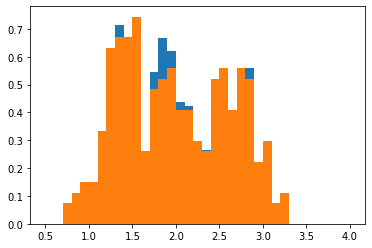

In [72]:
a = plt.hist(temp.T[2],range=[0.5,4],bins = 35,weights = temp.T[-1],density = True)
b = plt.hist(temp.T[2],range=[0.5,4],bins = 35,density = True)

In [75]:
vipers = np.array([  22.25884211,   73.61974206,   96.95719425,  182.83452198,
        388.48604733,  566.16303601,  899.05752991, 1226.51168855,
       1449.91173701, 1814.6496117 , 1913.94104881, 1954.05741294,
       1751.02163463, 1787.5348424 , 1598.47401272, 1564.33817441,
       1421.08896336, 1206.88034746, 1186.44142909, 1302.0880034 ,
       1428.66739193, 1695.86187914, 1978.28144662, 2115.51071339,
       1960.48737711, 1521.11667616, 1101.90137687,  614.43578141,
        322.05506783,  135.37566107,   37.08545198,    4.24180783,
          2.43961942,    0.        ,    0.        ])

In [70]:
vipers

array([  22.25884211,   73.61974206,   96.95719425,  182.83452198,
        388.48604733,  566.16303601,  899.05752991, 1226.51168855,
       1449.91173701, 1814.6496117 , 1913.94104881, 1954.05741294,
       1751.02163463, 1787.5348424 , 1598.47401272, 1564.33817441,
       1421.08896336, 1206.88034746, 1186.44142909, 1302.0880034 ,
       1428.66739193, 1695.86187914, 1978.28144662, 2115.51071339,
       1960.48737711, 1521.11667616, 1101.90137687,  614.43578141,
        322.05506783,  135.37566107,   37.08545198,    4.24180783,
          2.43961942,    0.        ,    0.        ])

In [77]:
scipy.stats.ks_2samp(a[0],vipers)

KstestResult(statistic=0.8, pvalue=2.1371147048109803e-11)